<br><br>

<p style="color:red; font-size:1.3em;">종종 Jupyter notebook에서 <b>Kernel Dead</b> 메시지가 뜨면서 강제로 kernel이 종료될 수 있습니다.</p><br>
<p style="font-size:1.3em;">이 현상은 이미지 파일 등을 처리할 때 컴퓨터의 메모리 부족 등의 이유로 발생할 수 있으며,<br><br>
만일 Kernel Dead 메시지가 뜨면 <span style="color:red;"> <b>다시 첫번째 Cell부터 실행하며 내려가다가 해당 Cell을 제외하고 실행</b>시켜주세요!</span></p>
    
<br><br>

<hr>
<br>

#### **torchvision** <br><br> :	 Computer vision 문제들에서 활용되는 datasets / model architectures / image transformations / etc. 들이 들어있는 **라이브러리**
<br>

<hr>
<br>

#### torchvision.**datasets** <br><br> :  Computer vision 관련 예시 데이터셋 (image classification / object detection / image captioning / video classification / etc.)<br><br> + Custom dataset 을 만들기 위한 base class들도 포함되어 있음
<br>

<hr>
<br>

#### torchvision.**models** <br><br> :  Computer vision 관련 Pre-trained models
<br>

<hr>
<br>

#### torchvision.**transforms** <br><br> :  Image transformation 관련 도구들
<br>

<hr>
<br>

#### torch.**utils.data.Dataset** <br><br> :  PyTorch의 기본 Dataset 클래스
<br>

<hr>
<br>

#### torch.**utils.data.DataLoader** <br><br> : torch.utils.data.Dataset 클래스 변수를 바탕으로 python iterable을 생성해주는 클래스
<br>

<hr>
<br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import torch
from torch import nn

from torch.utils.data import DataLoader # class for loading the dataset (Dataset -> Batches)
from torchmetrics import Accuracy

import torchvision # Py"torch" for computer "vision"
from torchvision import transforms

print(torch.__version__)
print(torchvision.__version__)

/opt/anaconda3/envs/goormthon/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.3.1
0.18.1


<br>
<br>

# 1. Download the dataset

<br>
<br>

## 1) Download & browse the dataset

In [5]:
train_data = torchvision.datasets.FashionMNIST(
    root="data", # 데이터를 다운로드할 디렉토리
    train=True, # get train data
    download=True,
    transform=transforms.ToTensor(), # (Original) PIL format -> PyTorch tensors ("to tensor")
    target_transform=None # target 데이터 역시도 원할 경우 transform 가능
)

# Setup testing data
test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=transforms.ToTensor() # (Original) PIL format -> PyTorch tensors
)

In [6]:
train_data.classes # original names of classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
train_data[0] # first X & y

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
train_data[0][0].shape # num_channels, height, width

torch.Size([1, 28, 28])

In [10]:
train_data[0][1]

9

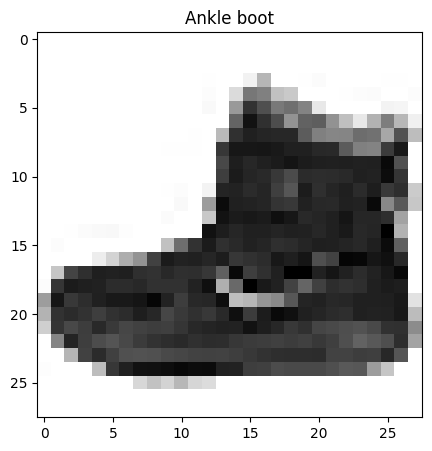

In [9]:
image, label_num = train_data[0]

image = image.reshape(28, 28) # [1, 28, 28] -> [28, 28]
label = train_data.classes[label_num]

plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(image, cmap='gray_r') # Original image (gray-scale)
plt.title(label)
plt.show()

<br>
<br>

# 2. Prepare the **DataLoader**
<br>

### : a **large Dataset** -> a Python iterable of **smaller chunks** (== **mini-batches**) 

In [12]:
# from torch.utils.data import DataLoader

In [10]:
# Dataset -> Batches (iterable)

dataloader_train = DataLoader(train_data, # train_data <- X & y included
    batch_size=32, # 32, 64, 128, 256, 512, ...
    shuffle=True # per epoch
)

dataloader_test = DataLoader(test_data,
    batch_size=32,
    shuffle=False # 테스트 데이터는 shuffling할 필요가 없습니다.
)

<br>
<br>

# 3. Build the model - **Convolutional Neural Network (CNN)**

<br>

## 1)  nn.**Conv2d**()

In [11]:
# torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64)) # [ number of batches, number of channels, height, width ]

image_sample = images[0] # get a single image for testing

print(images.shape)
print(image_sample.shape)

image_sample

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])


tensor([[[-0.4626,  0.1576, -0.7093,  ..., -1.9900,  2.0867, -0.4599],
         [ 0.0028,  2.0762, -0.2531,  ..., -2.1465, -0.4313, -1.1250],
         [-0.7617, -0.0739,  1.0806,  ..., -0.6106, -0.0493, -0.3749],
         ...,
         [ 0.1213,  0.1384, -1.2807,  ...,  0.7226, -0.5860, -2.3009],
         [-0.8288,  1.4389, -0.0035,  ...,  1.2702,  0.4488, -0.5107],
         [ 0.3511, -0.1346,  1.4997,  ..., -0.4714,  0.7537,  0.3968]],

        [[-1.2509,  2.6796,  1.1037,  ...,  0.1545, -1.2632,  1.8175],
         [ 1.6263, -0.8547,  0.7143,  ..., -0.6890,  2.1224, -1.1231],
         [-1.0519, -0.6653, -0.2097,  ...,  0.8038, -0.5512, -0.5625],
         ...,
         [ 0.9528, -0.3324, -0.7250,  ..., -0.3156,  0.6387, -1.0610],
         [-0.5823,  0.7522, -0.5370,  ...,  0.0201,  0.0300,  0.5876],
         [-0.7138,  0.0842,  0.3473,  ...,  0.5367,  0.6922, -0.4313]],

        [[ 1.1828,  0.4952, -0.6567,  ..., -0.1268,  0.3600,  0.2446],
         [-0.7534,  0.0460, -0.5656,  ..., -1

In [12]:
image_sample = image_sample.reshape(1, 3, 64, 64) # [3, 64, 64] -> [1, 3, 64, 64]

image_sample.shape

torch.Size([1, 3, 64, 64])

In [13]:
# Convolutional-layer for 2-Dimensional data

conv_layer = nn.Conv2d(in_channels=3,      # number of channels (or number of feature-maps of previous layer)
                       out_channels=10,    # number of feature-maps (== number of filters)
                       kernel_size=(3, 3), # filter-size (3x3)
                       stride=1,           # (default) window sliding
                       padding=0)          # (default) [ 0 == 'valid' == no-padding ] or [ 1 == 'same' == zero-padding ]

conv_result = conv_layer(image_sample)

conv_result.shape # 10 == number of feature-maps created by this conv-layer

torch.Size([1, 10, 62, 62])

In [14]:
conv_layer.state_dict() # parameters included in conv_layer

OrderedDict([('weight',
              tensor([[[[ 0.1887, -0.0449,  0.0895],
                        [-0.1164, -0.1510,  0.1872],
                        [-0.1892,  0.0952, -0.0913]],
              
                       [[ 0.1772, -0.0164, -0.1884],
                        [ 0.0254, -0.1521,  0.0234],
                        [-0.0240,  0.1142,  0.0926]],
              
                       [[ 0.1459,  0.0288, -0.1598],
                        [ 0.1350,  0.0946,  0.1644],
                        [-0.1275, -0.1501, -0.0087]]],
              
              
                      [[[-0.0691, -0.1592,  0.0449],
                        [-0.0602,  0.0047,  0.1383],
                        [ 0.1388, -0.0264, -0.1827]],
              
                       [[-0.0791,  0.1807,  0.0264],
                        [-0.1157, -0.1047, -0.1899],
                        [-0.1395, -0.0817,  0.1580]],
              
                       [[ 0.1252, -0.1408, -0.1094],
                        [-0.0533

In [15]:
conv_layer.state_dict()['weight'].shape # [ number of filters, number of channels, height of filter, width of filter ] 

torch.Size([10, 3, 3, 3])

In [16]:
conv_layer.state_dict()['bias'].shape # one bias per one filter

torch.Size([10])

<br>
<br>

## 2)  nn.**MaxPool2d**()

In [17]:
image_sample.shape

torch.Size([1, 3, 64, 64])

In [18]:
# (Max) Pooling-layer for 2-Dimensional data

pool_layer = nn.MaxPool2d(kernel_size=2) # 2x2 

conv_result = conv_layer(image_sample)

print('After conv_layer :', conv_result.shape)

pool_result = pool_layer(conv_result)

print('After pool_layer :', pool_result.shape)

After conv_layer : torch.Size([1, 10, 62, 62])
After pool_layer : torch.Size([1, 10, 31, 31])


In [19]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 4, 4)) # [ number of batches, number of channels, height, width ]

print(random_tensor, '\n')
print(random_tensor.shape, '\n\n')

pool_result = pool_layer(random_tensor)

print(pool_result, '\n')
print(pool_result.shape)

tensor([[[[ 1.9269,  1.4873,  0.9007, -2.1055],
          [ 0.6784, -1.2345, -0.0431, -1.6047],
          [-0.7521,  1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688,  0.7624]]]]) 

torch.Size([1, 1, 4, 4]) 


tensor([[[[1.9269, 0.9007],
          [1.6487, 0.7624]]]]) 

torch.Size([1, 1, 2, 2])


<br>
<br>

## 3)  Build the model

#### -> We will use a **TinyVGG** structure from CNN Explainer (https://poloclub.github.io/cnn-explainer/).

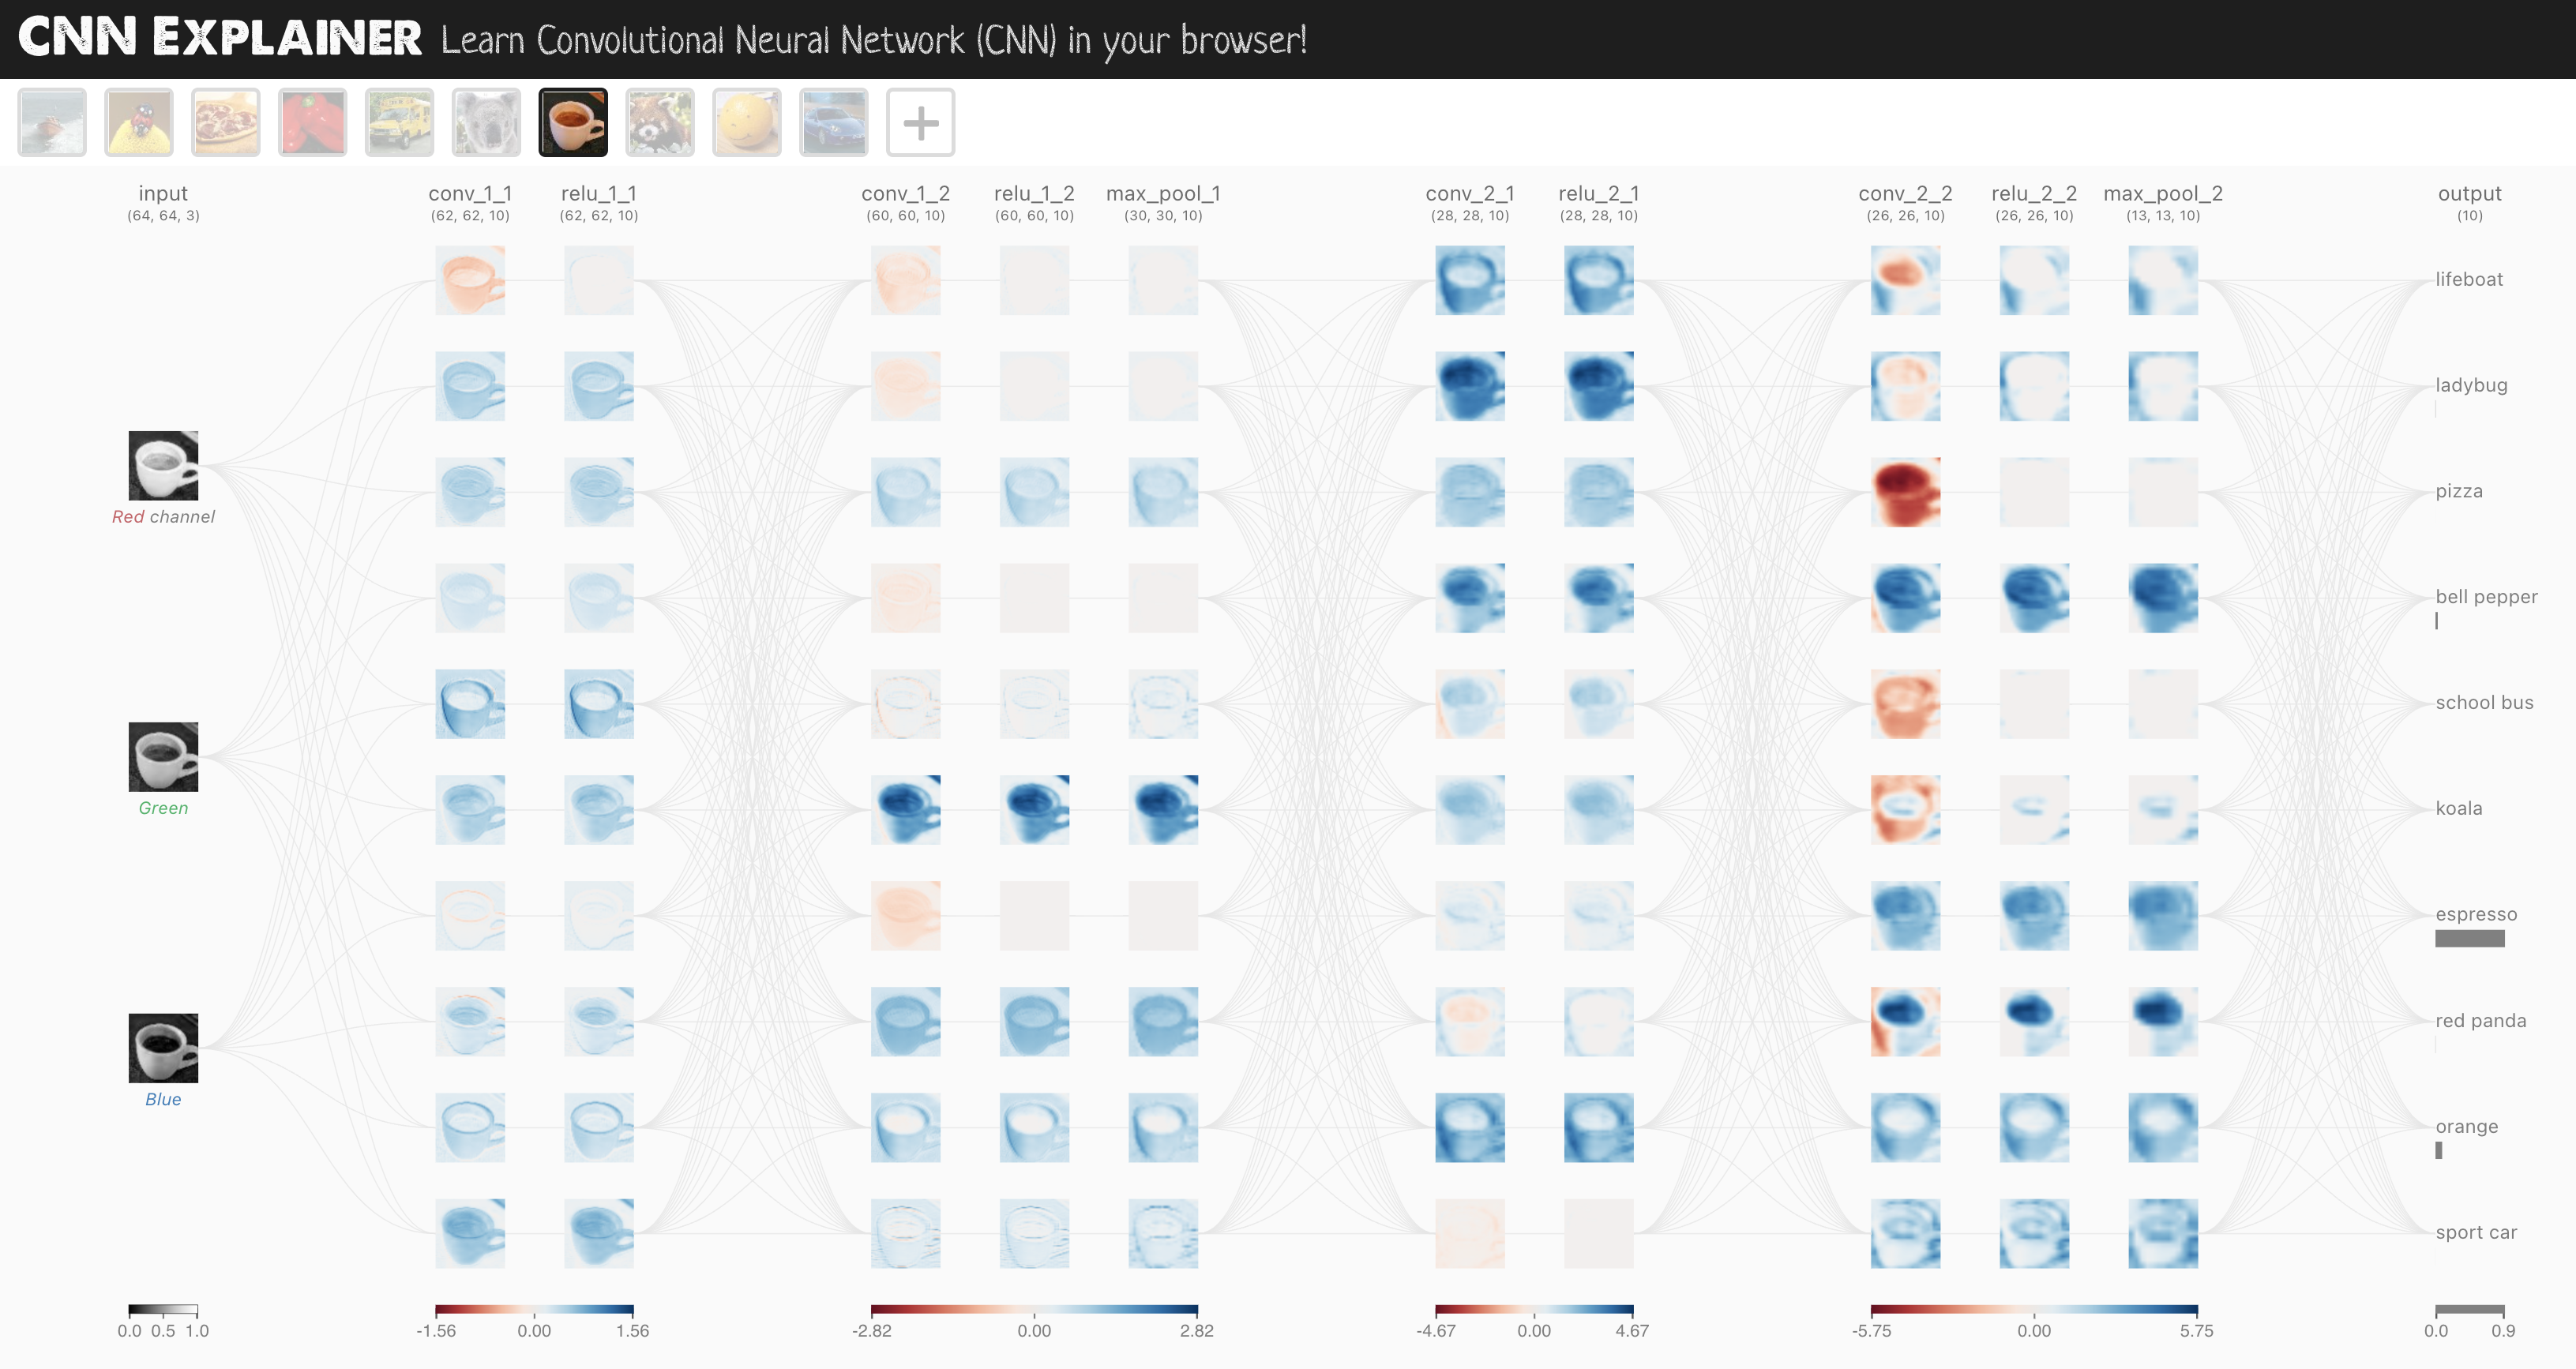

In [21]:
class FMNIST_CNN(nn.Module): # should inherit the class nn.Module
    
    
    def __init__(self, num_channels, num_filters, num_classes): 
        
        super().__init__()
        
        
        self.conv_block_entrance = nn.Sequential( # Create a sequential model
            
            # Convolution-layer
            nn.Conv2d(in_channels=num_channels, 
                      out_channels=num_filters, # num_filters == num of feature-maps == num of output channels
                      kernel_size=(3, 3), 
                      stride=1,     # default
                      padding=1),   # 0 == 'valid', 1 == 'same' 
            nn.ReLU(),
            
            # Convolution-layer
            nn.Conv2d(in_channels=num_filters,  # should be same as the number of "channels of previous output"
                      out_channels=num_filters,
                      kernel_size=(3, 3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            
            # Pooling-layer
            nn.MaxPool2d(kernel_size=2, stride=2) # "stride" Default == kernel_size (자동으로 지정됨)
        )
        # [ 32, 1, 28, 28 ] -> [ 32, 10, 14, 14 ]
        
        
        self.conv_block_within = nn.Sequential( # Create a sequential model
            nn.Conv2d(num_filters, num_filters, (3, 3), padding=1),
            nn.ReLU(), # Activation
            nn.Conv2d(num_filters, num_filters, (3, 3), padding=1),
            nn.ReLU(), # Activation
            nn.MaxPool2d(2)
        )
        # [ 32, 10, 14, 14 ] -> [ 32, 10, 7, 7 ]
        
        
        self.classifier_block = nn.Sequential( # Create a sequential model
            nn.Flatten(), # Flatten the input data
            nn.Linear(in_features=num_filters * 7 * 7, # Linear-combination
                      out_features=num_classes)
        )
        # [ 32, 10, 7, 7 ] -> [ 32, 10 * 7 * 7 ] -> [ 32, 10 ]
    
    
    def forward(self, x): # should override the method "forward"
        
        x = self.conv_block_entrance(x)
        # print(x.shape)
        
        x = self.conv_block_within(x)
        # print(x.shape)
        
        x = self.classifier_block(x)
        # print(x.shape)
        
        return x

<br>
<br>

# 4.  Train the model

In [22]:
device = "mps" if torch.backends.mps.is_available() else "cpu" # "cuda"가 사용 가능하다면 (if it "is available")

device

'mps'

In [23]:
torch.manual_seed(42) # "Manually" set the "seed"

model = FMNIST_CNN(num_channels=1, # FashionMNIST == gray-scale (number of channels == 1)
                   num_filters=10, # number of filters == number of feature-maps
                   num_classes=10  # FashionMNIST has 10 classes 
                  ).to(device)
    
model

FMNIST_CNN(
  (conv_block_entrance): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_within): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [26]:
# # 모델 내에서의 Shape 변화를 확인하고 싶을 경우 forward 함수 내 주석 해제 후 아래 코드를 실행해주세요.

# temp_batch_x = next(iter(dataloader_train))[0]

# print(temp_batch_x.shape)

# model(temp_batch_x)

In [24]:
loss_fn = nn.CrossEntropyLoss() # Softmax + CrossEntropy (built-in Softmax)

optimizer = torch.optim.Adam(params=model.parameters(), # "parameters" to optimize (apply gradient descent)
                             lr=0.01) # "l"earning "r"ate 
    
metric_accuracy = Accuracy(task='multiclass',
                           num_classes=10).to(device) # from torchmetrics import Accuracy

In [25]:
torch.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):
    
    print("Epoch :", epoch, "\n--------------")
    
    loss_train = 0 # epoch 내 batch 당 평균 train cost 계산을 위한 변수
    loss_test  = 0 # epoch 내 batch 당 평균 test  cost 계산을 위한 변수
    acc_test   = 0 # epoch 내 batch 당 평균 test  acc  계산을 위한 변수
    
    for batch_idx, (X, y) in enumerate(dataloader_train): # get an item from DataLoader with it's index number
        
        # X & y == a single batch
        X = X.to(device)
        y = y.to(device)
        
        # 모델을 training mode로 설정 (default state)
        model.train() 
        
        # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        y_pred = model(X)
        
        # 2. Training cost 계산 (Cost function 계산)
        loss = loss_fn(y_pred, y) # cost of batch <- nn.CrossEntropyLoss() : built-in Softmax
        loss_train += loss 

        # 3. Optimizer 내부의 이전 gradient 값 초기화 (Make "grad" to "zero")
        optimizer.zero_grad()

        # 4. Back-propagation ("Backward" propagation)
        loss.backward()

        # 5. Gradient descent 진행 (Take a "step" to update parameters)
        optimizer.step()
    
    
    # 모델을 evaluation mode로 설정
    model.eval()
    
    with torch.inference_mode(): # Set "inference mode"
        
        for X, y in dataloader_test: # get an item from DataLoader
            
            X = X.to(device)
            y = y.to(device)
            
            # (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
            test_pred = model(X)
            
            # Test cost 계산
            loss_test += loss_fn(test_pred, y) # cost of batch 
            acc_test  += metric_accuracy(test_pred.argmax(dim=1), y) # Softmax 적용 여부는 argmax 결과에 영향을 미치지 않음
        
        loss_test_avg = loss_test / len(dataloader_test) # cost of batches / num of batches (calculate average)
        acc_test_avg  = acc_test  / len(dataloader_test) # acc  of batches / num of batches (calculate average)


    loss_train_avg = loss_train / len(dataloader_train) # cost of batches / num of batches (calculate average)
    
    print(f"\nTrain loss: {loss_train_avg:.5f} | Test loss: {loss_test_avg:.5f}, Test acc: {acc_test_avg:.2f}%\n")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 
--------------


 20%|██        | 1/5 [00:10<00:43, 10.88s/it]


Train loss: 0.48871 | Test loss: 0.40587, Test acc: 0.85%

Epoch : 1 
--------------


 40%|████      | 2/5 [00:20<00:29,  9.92s/it]


Train loss: 0.37583 | Test loss: 0.40907, Test acc: 0.85%

Epoch : 2 
--------------


 60%|██████    | 3/5 [00:29<00:19,  9.66s/it]


Train loss: 0.36182 | Test loss: 0.38705, Test acc: 0.86%

Epoch : 3 
--------------


 80%|████████  | 4/5 [00:38<00:09,  9.60s/it]


Train loss: 0.34860 | Test loss: 0.37789, Test acc: 0.86%

Epoch : 4 
--------------


100%|██████████| 5/5 [00:48<00:00,  9.70s/it]


Train loss: 0.34705 | Test loss: 0.36638, Test acc: 0.87%



<br>
<br>

# 5. Evaluate the model

In [26]:
torch.manual_seed(42)

loss_test = 0
acc_test  = 0


# 1. 모델을 evaluation mode로 설정
model.eval()

# 2. inference mode 세팅
with torch.inference_mode(): 
    
    # 3. Batch-data 준비
    for X, y in dataloader_test:
        
        X = X.to(device)
        y = y.to(device)
        
        # 4. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        y_pred = model(X)

        # 5. Test cost 계산
        loss_test += loss_fn(y_pred, y) # cost of batch 
        acc_test  += metric_accuracy(y_pred.argmax(dim=1), y) # Softmax 적용 여부는 argmax 결과에 영향을 미치지 않음

    # Calculate the average loss/acc per batch
    loss_test_avg = loss_test / len(dataloader_test) 
    acc_test_avg  = acc_test  / len(dataloader_test) 

In [27]:
model_result_3 = {"model_name": model.__class__.__name__, # 'FMNIST_CNN'
                  "model_loss": loss_test_avg.item(),
                  "model_acc": acc_test_avg.item()}

model_result_3

{'model_name': 'FMNIST_CNN',
 'model_loss': 0.3663772642612457,
 'model_acc': 0.8678115010261536}

<br>
<br>

# 6. Compare the models

In [29]:
import pickle # save & load python objects as pickle files

In [30]:
with open("model_result_1.pkl", 'rb') as f:
    model_result_1 = pickle.load(f)
    
with open("model_result_2.pkl", 'rb') as f:
    model_result_2 = pickle.load(f)

In [31]:
print(model_result_1)
print(model_result_2)
print(model_result_3)

{'model_name': 'FMNIST_LinearModel', 'model_loss': 0.4268104135990143, 'model_acc': 0.8525333404541016}
{'model_name': 'FMNIST_NonLinearModel', 'model_loss': 0.4195214509963989, 'model_acc': 0.8514000177383423}
{'model_name': 'FMNIST_CNN', 'model_loss': 0.3663772642612457, 'model_acc': 0.8678115010261536}


In [32]:
results = pd.DataFrame([model_result_1, model_result_2, model_result_3])

results

,model_name,model_loss,model_acc
0,FMNIST_LinearModel,0.426810,0.852533
1,FMNIST_NonLinearModel,0.419521,0.851400
2,FMNIST_CNN,0.366377,0.867812


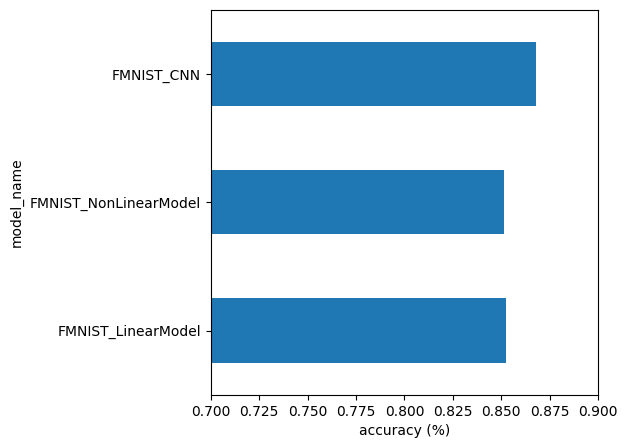

In [33]:
plt.figure(figsize=(5, 5), dpi=100)

results.set_index("model_name")["model_acc"].plot(kind="barh")

plt.xlabel("accuracy (%)")
plt.xlim(0.7, 0.9) # set limit on x-axis range
plt.show()

<br>
<br>

# (Appendix 1) Make predictions & Visualize the result

<br>

### Predict on several samples

In [34]:
import random

random.sample([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], k=3)

[2, 10, 4]

In [35]:
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    
    test_samples.append(sample)
    test_labels.append(label)

    
print(test_samples[0].shape)
print(test_labels[0])

torch.Size([1, 28, 28])
1


In [36]:
def make_prediction(model, img, device):

    # 1. 모델을 evaluation mode로 설정
    model.eval()
    
    # 2. inference mode 세팅
    with torch.inference_mode():
        
        img = img.reshape(1, 1, 28, 28).to(device) # [1, 28, 28] -> [1, 1, 28, 28]
            
        # 3. 순방향 전파 (Forward-pass)
        logits = model(img)
        
        # logits.shape == [1, 10]
        pred_prob = torch.softmax(logits, dim=1) # 행 방향으로 softmax 연산 적용

        # pred_prob.shape == [1, 10]
        pred_class = pred_prob.argmax(dim=1).item() # 행 방향으로 가장 큰 값의 index 번호 획득

    return pred_class

In [37]:
prediction = make_prediction(model=model, 
                             img=test_samples[0], 
                             device=device)
print(prediction)
print(test_labels[0])

1
1


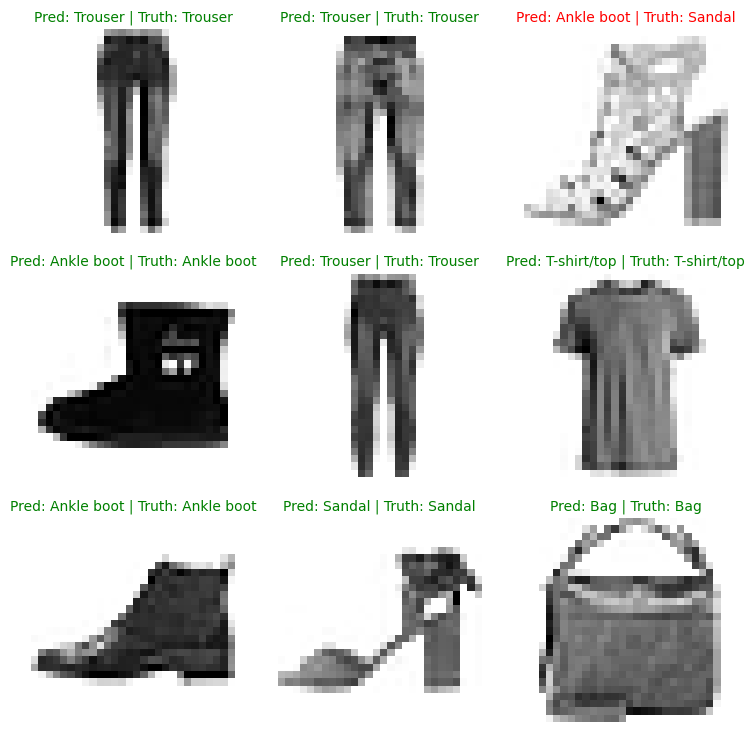

In [38]:
fig = plt.figure(figsize=(9, 9), dpi=100)

nrows = 3
ncols = 3

for idx, sample in enumerate(test_samples): # get an item with it's index number
    
    
    # Predicted class name
    pred_class = make_prediction(model=model, 
                                 img=sample, 
                                 device=device)
    pred_label = test_data.classes[pred_class] # class names @ test_data.classes
    
    
    # Ground-truth class name
    truth_label = test_data.classes[test_labels[idx]]
    
    
    # Plot the result
    subplot = fig.add_subplot(nrows, ncols, idx+1) # idx == 1->9
    
    # Visualize the real image
    plt.imshow(sample.reshape(28, 28), cmap="gray_r")
    
    # Create and set the title of the subplot (per sample)
    subplot_title = "Pred: {} | Truth: {}".format(pred_label, truth_label)
    
    if pred_label == truth_label: # predicted label vs ground-truth label
        plt.title(subplot_title, fontsize=10, c="g") # correct
    else:
        plt.title(subplot_title, fontsize=10, c="r") # wrong
    
    subplot.axis('off')

<br>

### Plot a confusion matrix

In [40]:
# from tqdm.auto import tqdm

predicted_classes = []

# 1. 모델을 evaluation mode로 설정
model.eval()

# 2. inference mode 세팅
with torch.inference_mode(): 
    
    # 3. Batch-data 준비 (from dataloader_test)
    for X, y in tqdm(dataloader_test, desc="Predict on test data"): # Use TQDM to show pregress bar
    
        X = X.to(device)
        y = y.to(device)

        # 4. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        logits = model(X)

        y_pred = torch.softmax(logits, dim=1).argmax(dim=1) # logits -> predicted probs -> predicted class num

        predicted_classes = predicted_classes + list(y_pred.cpu().numpy()) # PyTorch Tensor -> "Numpy" Array

Predict on test data: 100%|██████████| 313/313 [00:00<00:00, 447.71it/s]


In [41]:
len(predicted_classes)

10000

In [42]:
len(test_data)

10000

In [44]:
from torchmetrics import ConfusionMatrix # Plot a confusion matrix

confusion_matrix = ConfusionMatrix(task='multiclass',num_classes=10)

In [45]:
results_cm = confusion_matrix(preds=torch.from_numpy(np.array(predicted_classes)), # "numpy 로부터" tensor 생성
                              target=test_data.targets)

In [46]:
results_cm

tensor([[884,   3,   7,  14,   1,   1,  82,   0,   8,   0],
        [  5, 966,   0,  17,   3,   0,   7,   0,   2,   0],
        [ 28,   4, 806,   4,  85,   0,  73,   0,   0,   0],
        [ 66,   8,   9, 852,  15,   0,  48,   0,   1,   1],
        [  2,   0, 107,  38, 745,   1, 107,   0,   0,   0],
        [  0,   0,   0,   1,   0, 941,   0,  30,   1,  27],
        [221,   1,  85,  17,  77,   1, 589,   0,   9,   0],
        [  0,   0,   0,   0,   0,   6,   0, 972,   0,  22],
        [  6,   1,   6,   3,   4,   2,  14,   4, 960,   0],
        [  0,   0,   0,   0,   0,   5,   1,  31,   0, 963]])

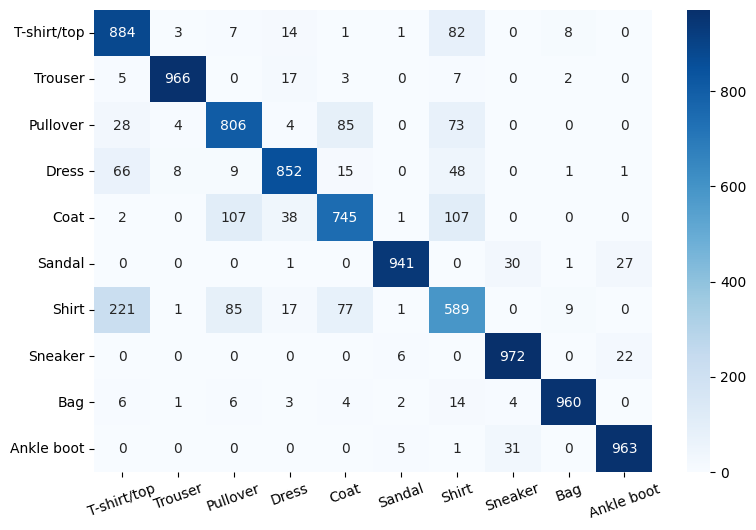

In [48]:
import seaborn as sns

plt.figure(figsize=(9, 6), dpi=100)

sns.heatmap(results_cm, cmap='Blues', 
            annot=True, annot_kws={"size": 10}, fmt='.4g',
            xticklabels=test_data.classes, 
            yticklabels=test_data.classes)

plt.xticks(rotation=20) # x축 라벨 회전(rotation)시키기

plt.show()

<br>
<br>

# (Appendix 2) Save the model

<br>
<br>

### 1) **Save**

<br>

#### 모델을 통째로 저장하고 불러오는 것도 가능 @ https://pytorch.org/tutorials/beginner/saving_loading_models.html

#### -> **torch.save(model, PATH)** & **model = torch.load(PATH)**

In [49]:
# Shorter version

torch.save(obj=model.state_dict(), # only parameters
           f='models/FMNIST_LinearModel_v1.pth')

In [49]:
# # Longer version (디렉토리부터 생성)


# # 1. 모델 파라미터 파일 저장을 위한 디렉토리 생성 (os.mkdir 함수로 대체하여 사용 가능)

# from pathlib import Path
# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True, exist_ok=True)
# # parents=True : any missing parents of this path are created as needed.
# # exist_ok=True : FileExistsError exceptions will be ignored.


# # 2. 모델 파라미터 저장경로 지정 

# MODEL_NAME = "FMNIST_LinearModel_v1.pth" # common convention for PyTorch saved models or objects : .pt or .pth
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME # WindowsPath('models/linear_regression_01.pth')


# # 3. 모델 파라미터 저장

# print('Saving model to :', MODEL_SAVE_PATH)

# torch.save(obj=model.state_dict(), # only parameters
#            f=MODEL_SAVE_PATH)

<br>
<br>

### 2) **Load**

In [50]:
model_loaded = FMNIST_CNN(num_channels=1, # should be same as the original model
                   num_filters=10, # should be same as the original model
                   num_classes=10  # should be same as the original model
                  )
    
model_loaded.load_state_dict(torch.load(f='models/FMNIST_LinearModel_v1.pth')) # load -> load_state_dict

model_loaded = model_loaded.to(device)

In [51]:
torch.manual_seed(42)

loss_test = 0
acc_test  = 0


# 1. 모델을 evaluation mode로 설정
model_loaded.eval()

# 2. inference mode 세팅
with torch.inference_mode(): 
    
    # 3. Batch-data 준비
    for X, y in dataloader_test:
        
        X = X.to(device)
        y = y.to(device)
        
        # 4. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        y_pred = model_loaded(X)

        # 5. Test cost 계산
        loss_test += loss_fn(y_pred, y) # cost of batch 
        acc_test  += metric_accuracy(y_pred.argmax(dim=1), y) # Softmax 적용 여부는 argmax 결과에 영향을 미치지 않음

    # Calculate the average loss/acc per batch
    loss_test_avg = loss_test / len(dataloader_test) 
    acc_test_avg  = acc_test  / len(dataloader_test) 
    
    
model_result_loaded = {"model_name": model_loaded.__class__.__name__, # 'FMNIST_LinearModel'
                       "model_loss": loss_test_avg.item(),
                       "model_acc": acc_test_avg.item()}

model_result_loaded

{'model_name': 'FMNIST_CNN',
 'model_loss': 0.3663772642612457,
 'model_acc': 0.8678115010261536}

In [52]:
model_result_3

{'model_name': 'FMNIST_CNN',
 'model_loss': 0.3663772642612457,
 'model_acc': 0.8678115010261536}

<br>
<br>

# (Appendix 3) torchvision.models (we will cover this later)

torchvision.models @ https://pytorch.org/vision/stable/models.html

- image classification (VGG, AlexNet, DenseNet, EfficientNet, GoogLeNet, MNASNet, MobileNet, VisionTransformer, etc.)
- pixelwise semantic segmentation
- object detection 
- instance segmentation
- person keypoint detection
- video classification
- optical flow

-> also offers [ INT8 quantized models ]